# Demonstrating the Wolfson Bipolarization Coefficient:

The Wolfson Polarization Index, introduced by Wolfson (1994), is a measure used to quantify the degree of bipolarization within a distribution, particularly income distributions. Unlike traditional inequality measures, such as the Gini coefficient, which capture the overall level of inequality within a distribution, the Wolfson index specifically focuses on the extent to which a distribution exhibits characteristics of bipolarization. This means it is sensitive to the presence of two distinct groups or "poles" in the distribution, which can signal social or economic divisions.

Bipolarization occurs when the population tends to cluster around two income poles, resulting in a “hollowing out” of the middle class. This phenomenon has been observed in many advanced economies where growing income inequality is not just due to the rich getting richer and the poor getting poorer, but also due to the diminishing size of the middle-income group.

The Wolfson index is defined mathematically in terms of the Lorenz curve, but it differs from traditional Lorenz-based indices (like the Gini coefficient) by its focus on the distance between the poles of a distribution. The index increases as the distribution becomes more polarized, which happens when the middle of the distribution thins out while the lower and upper ends of the distribution expand.

Wolfson’s work (1994) has been foundational in the field of inequality measurement, offering new insights into the nature of economic divisions beyond what is captured by measures like variance or Gini. By applying the Wolfson index to different income distributions, analysts can better understand the dynamics of income segmentation and social stratification within a population.


Wolfson, M. C. (1994). When Inequalities Diverge. The American Economic Review, 84(2), 353-358.

-------------------------

### 1. Imports & Input Data

In [1]:
from inequality.wolfson import wolfson


2.5
2.5
2.5


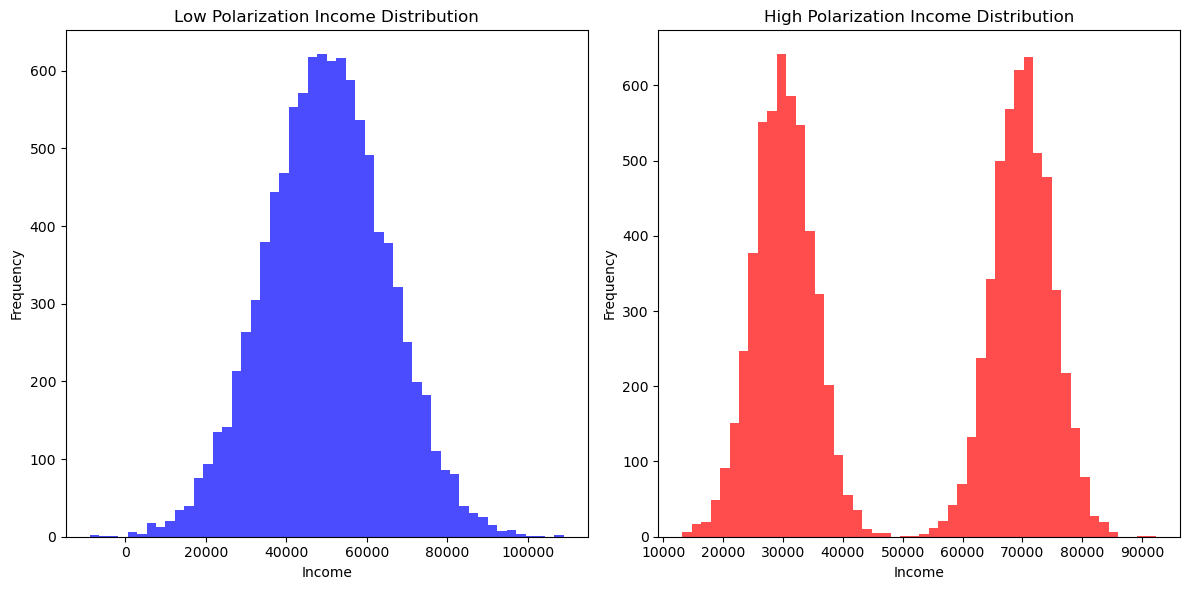

In [2]:
#| label: fig-polegraphs
#| fig-cap: "Left: A normal distribution showing low polarization. Right: A bimodal distribution showing high polarization as indicated by the presence of two centers."

import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Distribution 1: Low polarization (normal distribution)
income_low_polarization = np.random.normal(loc=50000, scale=15000, size=10000)

# Distribution 2: High polarization (bimodal distribution)
income_high_polarization = np.concatenate([
    np.random.normal(loc=30000, scale=5000, size=5000),
    np.random.normal(loc=70000, scale=5000, size=5000)
])

# Plotting the distributions
plt.figure(figsize=(12, 6))

# Plot for low polarization
plt.subplot(1, 2, 1)
plt.hist(income_low_polarization, bins=50, color='blue', alpha=0.7)
plt.title('Low Polarization Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')

# Plot for high polarization
plt.subplot(1, 2, 2)
plt.hist(income_high_polarization, bins=50, color='red', alpha=0.7)
plt.title('High Polarization Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')

# Show plots
plt.tight_layout()
plt.show()


As we might expect, the blue graph has a Wolfson index value close to 0 since it resembles a normal distribution, and the red graph has a higher index since it shows a clear separation between the low and high groups.

In [3]:
wolfson(income_high_polarization)

np.float64(0.17571224182763845)

In [4]:
wolfson(income_low_polarization)

np.float64(0.07016937981819878)

Now let's see the Wolfson index applied to the Mexican states income data from the Rey & Sastre-Gutierrez paper titled "Interregional Inequality Dynamics in Mexico" (2010).

In [5]:
import libpysal
import geopandas
pth = libpysal.examples.get_path("mexicojoin.shp")
gdf = geopandas.read_file(pth)

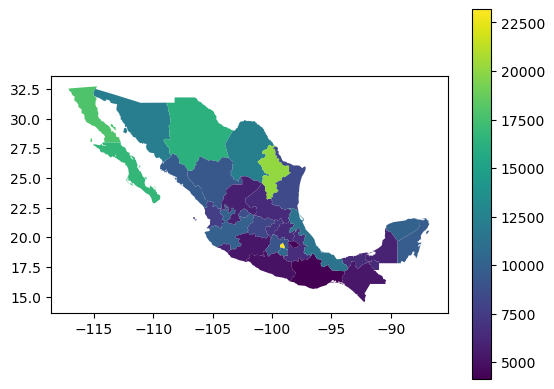

In [6]:
#| label: fig-mexico1960
#| fig-cap: "Mexican states by per-capita GDP for the year 1969.  Darker colors represent less wealthy states and lighter colors represent more wealthy states."

gdf.plot(column='PCGDP1960', legend=True);

(array([8., 6., 7., 4., 2., 0., 2., 1., 1., 1.]),
 array([ 4140. ,  6043.4,  7946.8,  9850.2, 11753.6, 13657. , 15560.4,
        17463.8, 19367.2, 21270.6, 23174. ]),
 <BarContainer object of 10 artists>)

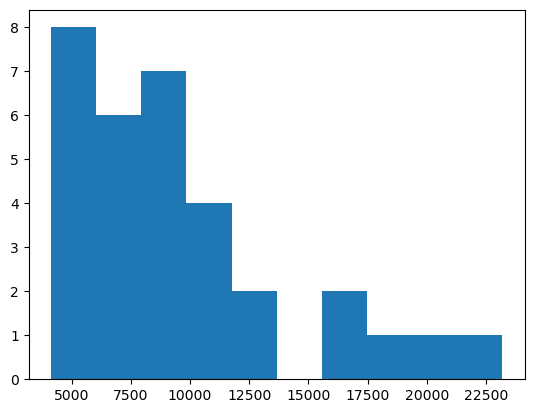

In [7]:
#| label: fig-mexico1960hist
#| fig-cap: "Histogram for the incomes from @fig-mexico1960. It shows a relatively right-skewed distribution with a center towards the left end of the graph."

plt.hist(gdf.PCGDP1960)

Calculate the Wolfson index for this income distribution.

In [8]:
wolfson(gdf.PCGDP1960)

np.float64(0.11070986960431652)

Now let's examine the income distribution for the year 2009.  we will use the PCGDP2000 column from the Mexico geodataframe.

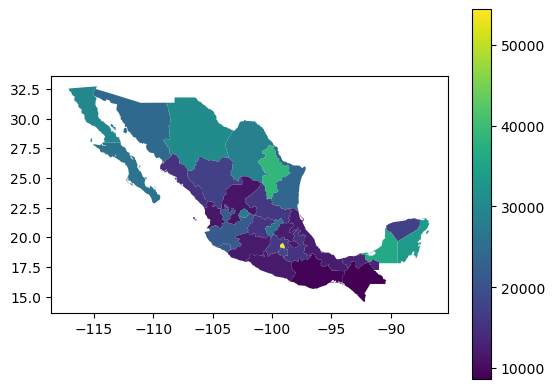

In [9]:
#| label: fig-mexico2000
#| fig-cap: "Income distribution by state for the year 2009."

gdf.plot(column='PCGDP2000', legend=True);

(array([9., 8., 3., 4., 4., 1., 2., 0., 0., 1.]),
 array([ 8684. , 13250.5, 17817. , 22383.5, 26950. , 31516.5, 36083. ,
        40649.5, 45216. , 49782.5, 54349. ]),
 <BarContainer object of 10 artists>)

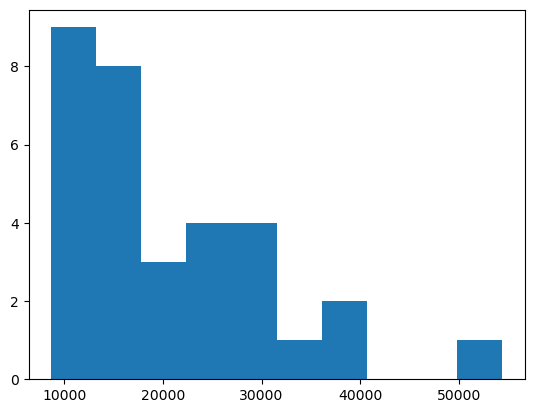

In [10]:
#| label: fig-mexico2000hist
#| fig-cap: "Corresponding histogram for @fig-mexico2000."

plt.hist(gdf.PCGDP2000)

Calculate the Wolfson index for 2009.

In [11]:
wolfson(gdf.PCGDP2000)

np.float64(0.13617347834498972)

Lastly, let's calculate the index for the different time periods and visualize its trend over time.

In [12]:
years = range(1940, 2010, 10)
w = [wolfson(gdf[f"PCGDP{year}"]) for year in years]

In [13]:
import pandas 

In [14]:
ts = pandas.DataFrame(data=years, columns=['year'])

In [15]:
ts['wolfson'] = w
ts = ts.set_index('year')

<Axes: xlabel='year'>

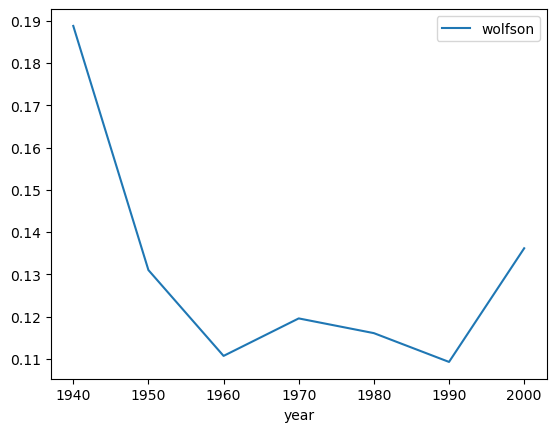

In [16]:
#| label: fig-wolfsongraph
#| fig-cap: "Wolfson index trend for the time period 1940-2000 for the Mexican states."

ts.plot()

As the graph shows, there was some degree of polarization at the end of the 1940s, then a decline through the 1960s.  It picked up again through the 1970s, followed by another two-decade decline through 1999.  The polarization picked up again, at a somewhat steeper/quicker pace, ending at around the same level where it was in 1959.  It is worth noting that the index stays above 0.10 for the entire time period, which might indicate that the middle-income group was significantly hollowed out compared to if the index was closer to 0 any point.  For visual and numerical comparison, see the red graph and its index in @fig-polegraphs.